In [57]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib.animation as anim

In [58]:
class Nave():
    
    def __init__(self,r0,phi0,P0,L0,m,t):
        
        self.r = r0
        self.phi = phi0
        self.P = P0
        self.L = L0
        self.m = m
        
        self.rVector = np.zeros(len(t))
        self.phiVector = np.zeros(len(t))
        self.PVector = np.zeros(len(t))
        self.LVector = np.zeros(len(t))
        
    def evolution(self,drdt,dphidt,dPdt,dLdt,i):
        """
        Implementamos Runge-Kutta 4 con las ecuaciones que se deducen de la teoría.
        """
        
        if i == 0:
            self.SetR(i,self.r)
            self.SetPhi(i,self.phi)
            self.SetP(i,self.P)
            self.SetL(i,self.L)
        
        else:
            #Parámetros en el pasado
            r_p = self.r
            phi_p = self.phi
            P_p = self.P
            L_p = self.L
            
            K1 = np.zeros(4)
            K2 = np.zeros(4)
            K3 = np.zeros(4)
            K4 = np.zeros(4)
            
            K1[0] = drdt(P_p)
            K1[1] = dphidt(r_p,L_p)
            K1[2] = dPdt(r_p,phi_p,L_p,i-1)
            K1[3] = dLdt(r_p,phi_p,i-1)
            
            K2[0] = drdt(P_p+0.5*K1[2])
            K2[1] = dphidt(r_p+0.5*K1[0],L_p+0.5*K1[3])
            K2[2] = dPdt(r_p+0.5*K1[0],phi_p+0.5*K1[1],L_p+0.5*K1[3],i-1+0.5)
            K2[3] = dLdt(r_p+0.5*K1[0],phi_p+0.5*K1[1],i-1+0.5)
            
            K3[0] = drdt(P_p+0.5*K2[2])
            K3[1] = dphidt(r_p+0.5*K2[0],L_p+0.5*K2[3])
            K3[2] = dPdt(r_p+0.5*K2[0],phi_p+0.5*K2[1],L_p+0.5*K2[3],i-1+0.5)
            K3[3] = dLdt(r_p+0.5*K2[0],phi_p+0.5*K2[1],i-1+0.5)
            
            K4[0] = drdt(P_p+K3[2])
            K4[1] = dphidt(r_p+K3[0],L_p+K3[3])
            K4[2] = dPdt(r_p+K3[0],phi_p+K3[1],L_p+K3[3],i)
            K4[3] = dLdt(r_p+K3[0],phi_p+K3[1],i)
            
            self.r = r_p + 1/6*(K1[0]+2*K2[0]+2*K3[0]+K4[0])
            self.phi = phi_p + 1/6*(K1[1]+2*K2[1]+2*K3[1]+K4[1])
            self.P = P_p + 1/6*(K1[2]+2*K2[2]+2*K3[2]+K4[2])
            self.L = L_p + 1/6*(K1[3]+2*K2[3]+2*K3[3]+K4[3])
            
            self.SetR(i,self.r)
            self.SetPhi(i,self.phi)
            self.SetP(i,self.P)
            self.SetL(i,self.L)
              
    #Setters
    def SetR(self,i,r):
        self.rVector[i] = r
    
    def SetPhi(self,i,phi):
        self.phiVector[i] = phi
        
    def SetP(self,i,P):
        self.PVector[i] = P
        
    def SetL(self,i,L):
        self.LVector[i] = L

In [87]:
#Ecuaciones del movimiento
t = np.linspace(0,int(86400*2),1+int(86400*2))
d = 3.844E8
G = 6.67E-11
MT = 5.9736E24
ML = 0.07349E24
RT = 6.3781E6
freq_luna = 2.6617E-6

Delta = G*MT/d**3
miu = ML/MT

def r_dot(P):
    return P

def phi_dot(r,L):
    return L/r**2

def P_dot(r,phi,L,t):
    r_ = np.sqrt(1+r**2-2*r*np.cos(phi-freq_luna*t))
    return (L**2/r**3)-Delta*(1/r**2+(miu/r_**3)*(r-np.cos(phi-freq_luna*t)))

def L_dot(r,phi,t):
    r_ = np.sqrt(1+r**2-2*r*np.cos(phi-freq_luna*t))
    return -1*(Delta*miu*r/r_**3)*np.sin(phi-freq_luna*t)


In [92]:
def simulacion(v0,theta,t):
    #Parámetros iniciales de la nave
    r0 = RT/d
    phi0 = 0.488692
    P0 = (v0/d)*np.cos(theta-phi0)
    L0 = r0*(v0/d)*np.sin(theta-phi0)
    Columbia = Nave(r0,phi0,P0,L0,11900,t)
    
    #Modelo Lunar
    r_L = 1
    phi_L = 0
    r_LVector = np.zeros(len(t))
    phi_LVector = np.zeros(len(t))
    
    for it in tqdm(range(len(t))):
        Columbia.evolution(r_dot,phi_dot,P_dot,L_dot,it)
        phi_L += it*freq_luna
        r_LVector[it] = r_L
        phi_LVector[it] = phi_L     
    return [Columbia, r_LVector, phi_LVector]

In [114]:
Columbia,r_LVector,phi_LVector = simulacion(11190.,np.pi/2,t)

100%|██████████| 172801/172801 [00:19<00:00, 8734.48it/s] 


In [115]:
x_N = Columbia.rVector*np.cos(Columbia.phiVector)
y_N = Columbia.rVector*np.sin(Columbia.phiVector)

x_L = r_LVector*np.cos(phi_LVector)
y_L = r_LVector*np.sin(phi_LVector)

(-2.0, 2.0)

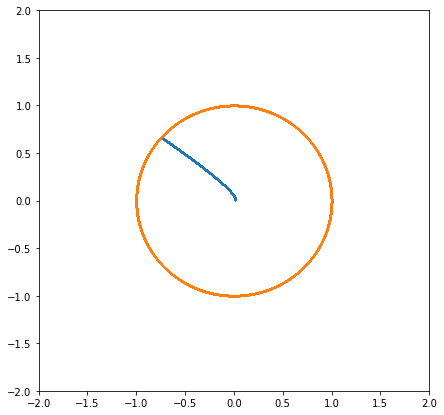

In [116]:
plt.figure(figsize=(7,7))
plt.scatter(x_N,y_N,s=0.01)
plt.scatter(x_L,y_L,s=0.01)
plt.xlim(-2,2)
plt.ylim(-2,2)

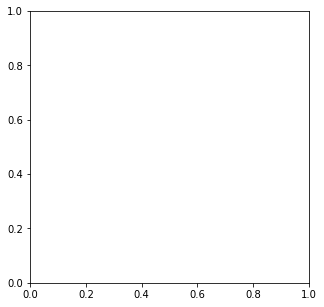

In [103]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

def init():
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    
def Update(i): 
    plot = ax.clear()
    init()
    ax.scatter(x_N[i],y_N[i],s=0.01)
    ax.scatter(x_L[i],y_L[i],s=0.01)
    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(t),init_func=init)

In [107]:
Animation.save('FallingBall.mp4')

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

In [105]:
!pip install ffmpeg


  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6084 sha256=b2cf1c04811e94befe3f7171241650253c94e47e6e9f28a0f2f75a7cea36d0f4
  Stored in directory: /home/jovyan/.cache/pip/wheels/64/80/6e/caa3e16deb0267c3cbfd36862058a724144e19fdb9eb03af0f
Successfully built ffmpeg
